In [1]:
from IPython.display import Image

합성곱 신경망의 구성 요소

In [2]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_01.png', width=700)

In [3]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_02.png', width=700)

합성곱 출력 크기 계산

In [4]:
import torch
import numpy as np

In [5]:
def conv1d(x, w, p=0, s=1):
  w_rot = np.array(w[::-1])
  x_padded = np.array(x)
  if p > 0:
    zero_pad = np.zeros(shape=p)
    x_padded = np.concatenate(
        [zero_pad, x_padded, zero_pad]
    )
    res = []
    for i in range(0, int( (len(x_padded) - len(w_rot))) + 1, s):
      res.append(np.sum(
          x_padded[i: i+w_rot.shape[0]] * w_rot
      ))
    return np.array(res)

x = [1,3,2,4,5,6,1,3]
w = [1,0,3,1,2]
print(f"Conv1d : {conv1d(x,w,p=2,s=1) }")
print(f"numpy : {np.convolve(x,w,mode='same') }")

Conv1d : [ 5. 14. 16. 26. 24. 34. 19. 22.]
numpy : [ 5 14 16 26 24 34 19 22]


2D conv

In [6]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_05.png', width=700)

In [7]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_06.png', width=600)

In [8]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_07.png', width=800)

In [9]:
import scipy.signal

def conv2D(x, w, p=(0,0), s=(1,1)):
  w_rot = np.array(w)[::-1, ::-1]
  X_orig = np.array(x)
  n1 = X_orig.shape[0] + 2*p[0]
  n2 = X_orig.shape[1] + 2*p[1]
  x_padded = np.zeros(shape=(n1,n2))
  x_padded[ p[0]:p[0]+X_orig.shape[0],
           p[1]:p[1]+X_orig.shape[1]
           ] = X_orig

  res = []
  for i in range(0, int( (x_padded.shape[0] - w_rot.shape[0])/s[0])+1, s[0]):
    res.append([])
    for j in range(0, int( (x_padded.shape[1] - w_rot.shape[1])/s[1])+1, s[1]):
      X_sub = x_padded[i:i+w_rot.shape[0], j:j+w_rot.shape[1]]
      res[-1].append(np.sum(X_sub * w_rot))
  return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print(f'conv2d : {conv2D(X,W,p=(1,1), s=(1,1))}')
print(f"사이파이 : { scipy.signal.convolve2d(X, W, mode='same') }")

conv2d : [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
사이파이 : [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [10]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_08.png', width=700)

In [11]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_09.png', width=800)

L2규제 드롭아웃으로  신경망 규제

In [12]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_10.png', width=700)

In [13]:
import torch.nn as nn
loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]), torch.tensor([1.0])  )
l2_lambda = 0.001

conv_layer = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5)
l2_penalty = l2_lambda * sum( [  (p**2).sum() for p in conv_layer.parameters()  ])
loss_with_penalty = loss + l2_penalty

linear_layer = nn.Linear(10,16)
l2_penalty = l2_lambda * sum( [  (p**2).sum() for p in linear_layer.parameters()  ])
loss_with_penalty = loss + l2_penalty

분류를 위한 손실함수

In [14]:
# logit : 확률을 변환하는데 사용하는 함수  - 로지스틱회귀 와 같은 분류모델에서 사용
# 입력특성과 해당 클래스 사이의 관계를 모델링

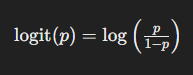

In [15]:
# p 0과 1사이의 확률
# pfmf 0 < p < 1 범위에서 임의의 실수로 변환
# 로짓은 확률의 로그오즈(log odds)를 나타내며 로그오즈는 성공확률과 실패확률 사이의 비율에 대한 자연로그
# 로짓은 분류문제에서 사용
# 로짓값을 확률로 변환하기 위해서는 로지스틱 함수가 적용

In [16]:
##### 이진 크로스 엔트로피
logit = torch.tensor([0.8])
probas = torch.sigmoid(logit)
target = torch.tensor([1.0])

bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()

print(f"BCE(확률) : {bce_loss_fn(probas, target):.4f}")
print(f"BCE(로짓) : {bce_logits_loss_fn(logit, target):.4f}")

##### 범주형 크로스 엔트로피
logit = torch.tensor([[1.5,0.8,2.1]])
probas = torch.softmax(logit, dim=1)
target = torch.tensor([2])

cce_loss_fn = nn.NLLLoss()  # 범주형 크로스 엔트로피 손실함수
cce_logits_loss_fn = nn.CrossEntropyLoss() # 로짓값을 입력으로 받는 범주형 크로스 엔트로피 손실함수

print(f"BCE(확률) : {cce_logits_loss_fn(logit, target):.4f}")
print(f"BCE(로짓) : {cce_loss_fn(torch.log(probas), target):.4f}")

BCE(확률) : 0.3711
BCE(로짓) : 0.3711
BCE(확률) : 0.5996
BCE(로짓) : 0.5996


파이토치를 사용하여 심층 합성곱 신경망 구현
  - 다층 CNN 구조

In [17]:

Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch14/figures/14_12.png', width=800)

In [18]:
import torchvision
from torchvision import transforms
image_path = './'
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root=image_path,train=True,transform=transform,download=True)
from torch.utils.data import Subset
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000,len(mnist_dataset)))
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,train=False,transform=transform,download=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 103210098.76it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 99864545.61it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 46270666.22it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20223491.26it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [24]:
from torch.utils.data import DataLoader

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False)

torch.nn 모듈을 사용해서 CNN 구현

In [20]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2) )
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))

model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2) )
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

x = torch.ones((4,1,28,28))
model(x).shape

# model = nn.Sequential()
# model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
# model.add_module('relu1', nn.ReLU())
# model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
# model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
# model.add_module('relu2', nn.ReLU())
# model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# x = torch.ones((4, 1, 28, 28))
# model(x).shape

torch.Size([4, 64, 7, 7])

In [21]:
model.add_module('flatten', nn.Flatten())
x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [22]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))
model.add_module('fc2', nn.Linear(1024, 10))

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
def train(model, num_epochs, train_dl, valid_dl):
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train = [0] * num_epochs
  loss_hist_valid = [0] * num_epochs
  accuracy_hist_valid = [0] * num_epochs
  for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_dl:
      x_batch = x_batch.to(device)
      y_batch = y_batch.to(device)
      pred  = model(x_batch)
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item() * y_batch.size(0)
      is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
      accuracy_hist_train[epoch] += is_correct.sum().cpu()
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)

    model.eval()  # 평가
    with torch.no_grad():
      for x_batch, y_batch in valid_dl:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_valid[epoch] += is_correct.sum().cpu()
    loss_hist_valid[epoch] /= len(valid_dl.dataset)
    accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

    print(f"에포크 : {epoch+1}   정확도 : {accuracy_hist_train[epoch]: .4f}\
         검증 정확도:{accuracy_hist_valid[epoch]:.4f}")
  return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)


에포크 : 1   정확도 :  0.9502         검증 정확도:0.9814
에포크 : 2   정확도 :  0.9842         검증 정확도:0.9864
에포크 : 3   정확도 :  0.9891         검증 정확도:0.9852
에포크 : 4   정확도 :  0.9919         검증 정확도:0.9895
에포크 : 5   정확도 :  0.9938         검증 정확도:0.9908
에포크 : 6   정확도 :  0.9947         검증 정확도:0.9890
에포크 : 7   정확도 :  0.9951         검증 정확도:0.9909
에포크 : 8   정확도 :  0.9962         검증 정확도:0.9903
에포크 : 9   정확도 :  0.9969         검증 정확도:0.9899
에포크 : 10   정확도 :  0.9969         검증 정확도:0.9903
에포크 : 11   정확도 :  0.9967         검증 정확도:0.9884
에포크 : 12   정확도 :  0.9968         검증 정확도:0.9890
에포크 : 13   정확도 :  0.9978         검증 정확도:0.9909
에포크 : 14   정확도 :  0.9980         검증 정확도:0.9907
에포크 : 15   정확도 :  0.9977         검증 정확도:0.9913
에포크 : 16   정확도 :  0.9982         검증 정확도:0.9917
에포크 : 17   정확도 :  0.9980         검증 정확도:0.9906
에포크 : 18   정확도 :  0.9981         검증 정확도:0.9902
에포크 : 19   정확도 :  0.9983         검증 정확도:0.9905
에포크 : 20   정확도 :  0.9981         검증 정확도:0.9897


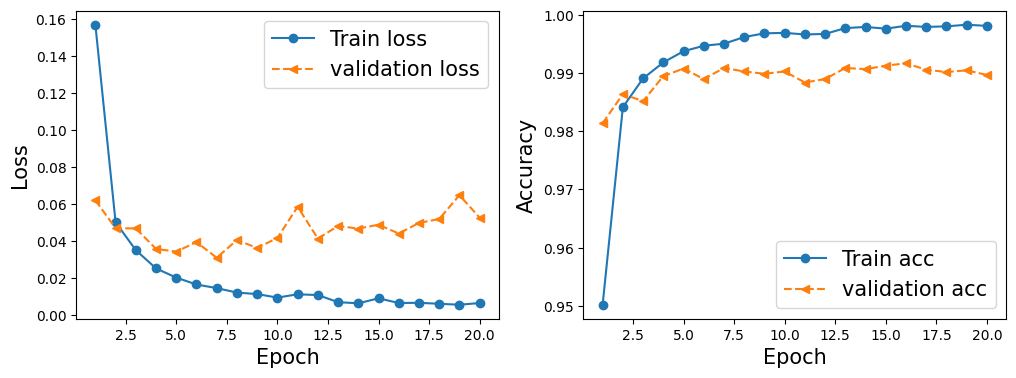

In [28]:
import matplotlib.pyplot as plt
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='validation loss')
ax.set_xlabel('Epoch', size=15); ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(x_arr, hist[2], '-o', label='Train acc')
ax.plot(x_arr, hist[3], '--<', label='validation acc')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel("Accuracy", size=15)
plt.show()

In [30]:
torch.cuda.synchronize()
model.cpu()
pred = model(mnist_test_dataset.data.unsqueeze(1) / 255)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f" 테스트 정확도 : {is_correct.mean():.4f}")

 테스트 정확도 : 0.9916


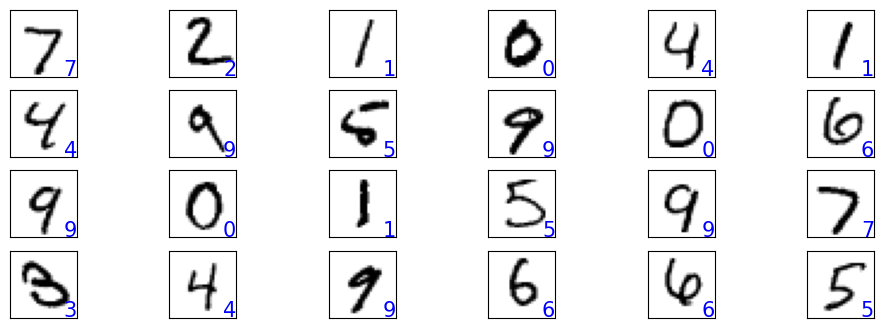

In [32]:
fig = plt.figure(figsize=(12,4))
for i in range(24):
  ax = fig.add_subplot(4,6, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  img = mnist_test_dataset[i][0][0, :,:]
  pred = model(img.unsqueeze(0).unsqueeze(1))
  y_pred = torch.argmax(pred)
  ax.imshow(img, cmap='gray_r')
  ax.text(0.9, 0.1, y_pred.item(),
          size=15, color='blue',
          horizontalalignment='center',
          verticalalignment = 'center',
          transform=ax.transAxes
  )
plt.show()

In [33]:
# import os
# if not os.path.exists('models'):
#   os.mkdir('models')
path = '/content/drive/MyDrive/mnist-cnn.ph'
torch.save(model, path)